In [1]:
import data_analysis_funcs as daf
import matplotlib.pyplot as plt

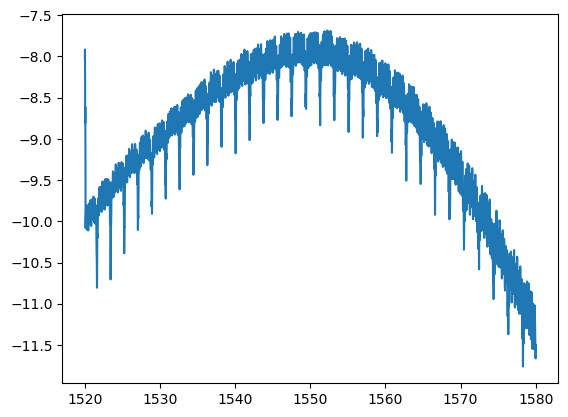

In [2]:
data_analyse_file="sg_rr_52_025 2023-12-11 18-30-06.csv"
wvlen_array,pow_array=daf.get_wavlen_and_pow_arrays(data_analyse_file)
daf.plot_visualise(wvlen_array,pow_array, full_range=True)

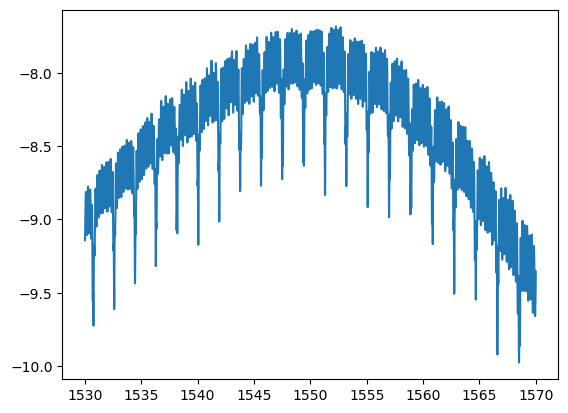

1530.0
1570.0


In [3]:
start_point_index=1000
end_point_index=5001
daf.plot_visualise(wvlen_array,pow_array,full_range=False,start_index=start_point_index,stop_index=end_point_index)
wvlen_peak_search=wvlen_array[start_point_index:end_point_index]
power_peak_search=pow_array[start_point_index:end_point_index]
print(wvlen_peak_search[0])
print(wvlen_peak_search[-1])

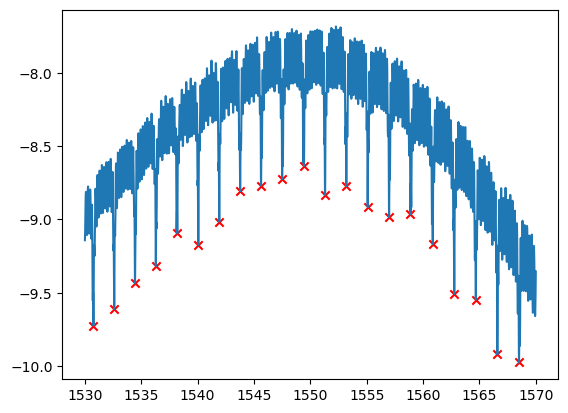

21
[1530.76, 1532.6, 1534.44, 1536.29, 1538.19, 1540.06, 1541.92, 1543.77, 1545.63, 1547.5, 1549.43, 1551.3, 1553.19, 1555.09, 1556.98, 1558.88, 1560.86, 1562.76, 1564.68, 1566.59, 1568.51]


In [4]:
wvlen_step_size=0.01
approx_fsr=2
promin_use=0.5
dist_use=(approx_fsr/2)/wvlen_step_size
#dist_use=1
peak_locs,n_peaks,peak_wavelens,peak_powers=daf.give_peak_locs(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
plt.plot(wvlen_peak_search,power_peak_search)
plt.scatter(peak_wavelens,peak_powers,color="red", marker="x")
plt.show()
print(n_peaks)#just added for sanity check
print(peak_wavelens)#sanity check

In [5]:
fsr_values=daf.calc_fsrs(peak_wavelens)
fsr_mean,fsr_error=daf.fsr_avg_and_error(fsr_values)
print(fsr_values)
print(fsr_mean)
print(fsr_error)

[1.84 1.84 1.85 1.9  1.87 1.86 1.85 1.86 1.87 1.93 1.87 1.89 1.9  1.89
 1.9  1.98 1.9  1.92 1.91 1.92]
1.8875
0.00784303244253661


Now to calculate peak widths below:

[0.12821714 0.12953065 0.13843829 0.12189103 0.13107645 0.12073253
 0.13541492 0.21606357 0.13978712 0.13492535 0.1409789  0.13093198
 0.22220219 0.14163283 0.14162433 0.14086064 0.135896   0.13061384
 0.14826374 0.07350769 0.14770657]


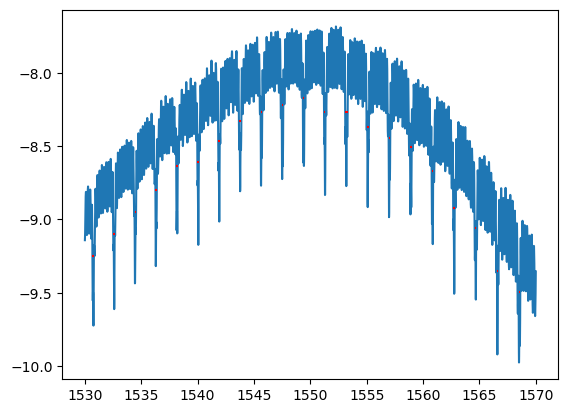

In [6]:
peak_width_data=daf.get_peak_FWHM(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
peak_widths=peak_width_data[0]
print(peak_widths)
peak_width_heights=peak_width_data[1]
peak_width_lefts=peak_width_data[2]
peak_width_rights=peak_width_data[3]
daf.plot_lines_FWHM(peak_width_heights,peak_width_lefts,peak_width_rights,wvlen_peak_search,power_peak_search)


Now calculating mean and standard error on FWHM using same func as for fsr:

In [7]:
mean_FWHM,FWHM_error=daf.fsr_avg_and_error(peak_widths)
print(mean_FWHM)
print(FWHM_error)


0.14049027315543716
0.006611210521104229
